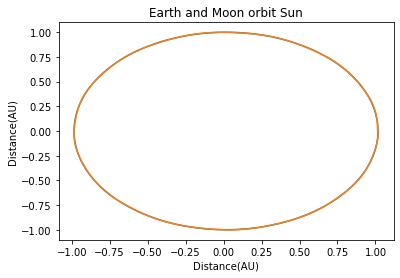

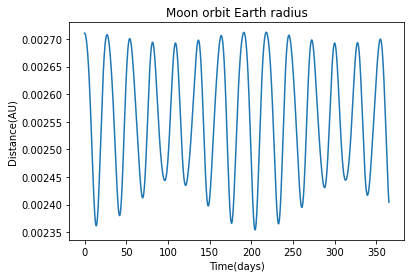

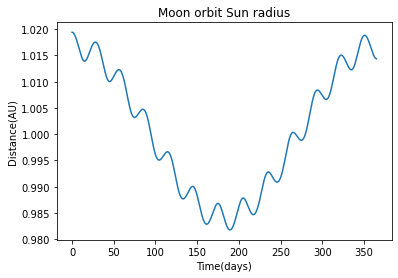

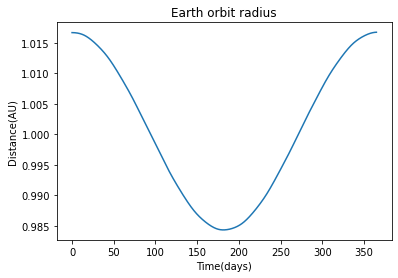

In [47]:
#Imports
import numpy as np
import matplotlib.pyplot as plt

#Constants
#Mass of Sun in kg, G Constant in m^3/(kg(s^2)), Orbit Length in seconds, 1AU in m
Sun_Mass = 1.989E+30
Earth_Mass = 5.9724E+24
Moon_Mass = 7.346E+22
G_Constant = 6.67408E-11
delta_t = 60
EDist = 1.521E+11
MDist = 4.055E+8
AU = 1.496E+11

#Inital Conditions
Earthx = EDist
Earthy = 0
Moonx = EDist + MDist
Moony = 0
Earthradius = (Earthx**2+Earthy**2)**(1/2)
MoonEradius = ((Moonx-Earthx)**2+(Moony-Earthy)**2)**(1/2)
MoonSradius = (Moonx**2+Moony**2)**(1/2)
Earthxvelocity = 0
Earthyvelocity = -29290
Moonxvelocity = -0
Moonyvelocity = -30260
Earthx_array = np.zeros(525600)
Earthy_array = np.zeros(525600)
Earthradius_array = np.zeros(525600)
Moonx_array = np.zeros(525600)
Moony_array = np.zeros(525600)
MoonEradius_array = np.zeros(525600)
MoonSradius_array = np.zeros(525600)
time = 0
t_end = 31536000
time_array = np.zeros(525600)
i = 0
j=0


while time<t_end:
    while i<time:
        Earthx = Earthx + Earthxvelocity*delta_t
        Earthy = Earthy + Earthyvelocity*delta_t
        Moonx = Moonx + Moonxvelocity*delta_t
        Moony = Moony + Moonyvelocity*delta_t
        Earthradius = (Earthx**2+Earthy**2)**(1/2)
        MoonEradius = ((Moonx-Earthx)**2+(Moony-Earthy)**2)**(1/2)
        MoonSradius = (Moonx**2+Moony**2)**(1/2)
        Earthxacceleration = (-(Sun_Mass*G_Constant*(Earthx))/(Earthradius**3) + (Moon_Mass*G_Constant*(Moonx-Earthx)/(MoonEradius**3)))
        Earthxvelocity = Earthxvelocity + Earthxacceleration*delta_t
        Earthyacceleration = (-(Sun_Mass*G_Constant*(Earthy))/(Earthradius**3) + (Moon_Mass*G_Constant*(Moony-Earthy)/(MoonEradius**3)))
        Earthyvelocity = Earthyvelocity + Earthyacceleration*delta_t
        Moonxacceleration = (-(Sun_Mass*G_Constant*(Moonx))/(MoonSradius**3) + (Earth_Mass*G_Constant*(Earthx-Moonx)/(MoonEradius**3)))
        Moonxvelocity = Moonxvelocity + Moonxacceleration*delta_t
        Moonyacceleration = (-(Sun_Mass*G_Constant*(Moony))/(MoonSradius**3) + (Earth_Mass*G_Constant*(Earthy-Moony)/(MoonEradius**3)))
        Moonyvelocity = Moonyvelocity + Moonyacceleration*delta_t
        i=i+delta_t
    Earthx_array[j] = Earthx / AU
    Earthy_array[j] = Earthy / AU
    Earthradius_array[j] = Earthradius / AU
    Moonx_array[j] = Moonx / AU
    Moony_array[j] = Moony / AU
    MoonEradius_array[j] = MoonEradius / AU
    MoonSradius_array[j] = MoonSradius / AU
    time_array[j] = time / 86400
    j=j+1
    time = time+delta_t

plt.plot(Earthx_array, Earthy_array)
plt.plot(Moonx_array, Moony_array)
plt.title('Earth and Moon orbit Sun')
plt.xlabel('Distance(AU)')
plt.ylabel('Distance(AU)')
plt.savefig('orbit.png')
plt.show()

plt.plot(time_array, MoonEradius_array)
plt.title('Moon orbit Earth radius')
plt.xlabel('Time(days)')
plt.ylabel('Distance(AU)')
plt.savefig('moonEradius.png')
plt.show()

plt.plot(time_array, MoonSradius_array)
plt.title('Moon orbit Sun radius')
plt.xlabel('Time(days)')
plt.ylabel('Distance(AU)')
plt.savefig('moonSradius.png')
plt.show()

plt.plot(time_array, Earthradius_array)
plt.title('Earth orbit radius')
plt.xlabel('Time(days)')
plt.ylabel('Distance(AU)')
plt.savefig('earthSradius.png')
plt.show()